In [ ]:
#análise de aminoácidos 


In [23]:
from collections import Counter
import matplotlib.pyplot as plt

In [24]:
aa_types = {
    'A': 'apolar',  'V': 'apolar',  'L': 'apolar',  'I': 'apolar',  'P': 'apolar',
    'F': 'apolar',  'M': 'apolar',  'W': 'apolar',  'G': 'apolar',

    'S': 'polar',   'T': 'polar',   'C': 'polar',   'Y': 'polar',   'N': 'polar',   'Q': 'polar',

    'D': 'ácido',   'E': 'ácido',

    'K': 'básico',  'R': 'básico',  'H': 'básico'
}

In [25]:
def adjust_charge(aa, ph):
    
    if aa == 'D' or aa == 'E':
        
        if ph < 4.0:
            return 'ácido protonado'  # -COOH (não ionizado)
        else:
            return 'ácido'  # -COO⁻ (ionizado)

    
    if aa == 'K' or aa == 'R':
        
        if ph < 9.0:
            return 'básico protonado'  # -NH₃⁺ (protonado)
        else:
            return 'básico'  # -NH₂ (desprotonado)

    if aa == 'H':
        
        if ph < 6.0:
            return 'básico protonado'
        else:
            return 'básico'

    
    return aa_types.get(aa, 'desconhecido')

In [26]:
def detect_ptms(seq):
    ptm_sites = {
        "Phosphorylation (S/T/Y)": sum(1 for aa in seq if aa in ['S', 'T', 'Y']),
        "Ubiquitination (K)": seq.count('K'),
        "Acetylation (K)": seq.count('K'),
        "Glycosylation (S/T/N)": sum(1 for aa in seq if aa in ['S', 'T', 'N']),
    }

    print("\nPotential Post-Translational Modification (PTM) Sites:")
    for mod, count in ptm_sites.items():
        print(f"{mod}: {count} possible site(s)")

In [27]:
seq = "MGCRDVHAATVLSFLCGIASVAGLFAGTLLPNWRKLRLITFNRNEKNLTVYTGLWVKCARYDGSSDCLMYDTTWYSSVDQLDLRVLQFALPLSMLIAMGALLLCLIGMCNTAFRSSVPNIKLAKCLVNSAGCHLVAGLLFFLAGTVSLSPSIWVIFYNIHLNKKFEPVFSFDYAVYVTIASAGGLFMTSLILFIWYCTCKSLPSPFWQPLYSHPPSMHTYSQPYSARSRLSAIEIDIPVVSHTT"

In [28]:
ph = 7.4  # Modifique o pH conforme necessário

In [29]:
seq = seq.upper()
filtered_seq = [aa for aa in seq if aa in aa_types]

In [30]:
adjusted_seq = [adjust_charge(aa, ph) for aa in filtered_seq]

In [31]:
type_counts = Counter([aa_types[aa] for aa in filtered_seq])

In [32]:
print("Frequência de tipos de aminoácidos na sequência (ajustada para pH {}):".format(ph))
for tipo, count in type_counts.items():
    print(f"{tipo.capitalize()}: {count} ({(count/len(filtered_seq))*100:.1f}%)")

Frequência de tipos de aminoácidos na sequência (ajustada para pH 7.4):
Apolar: 136 (55.7%)
Polar: 74 (30.3%)
Básico: 23 (9.4%)
Ácido: 11 (4.5%)


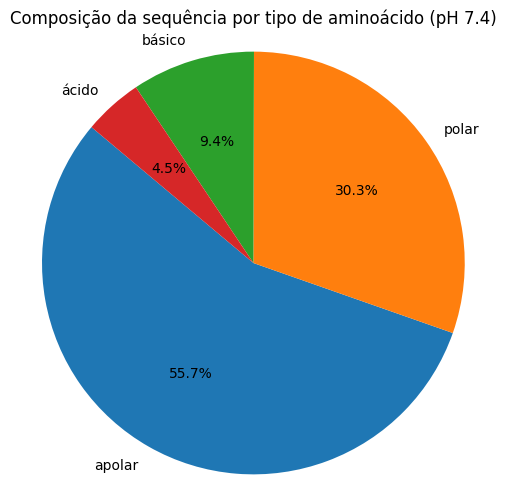

In [33]:
plt.figure(figsize=(6, 6))
plt.pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title(f"Composição da sequência por tipo de aminoácido (pH {ph})")
plt.axis('equal')
plt.show()

In [34]:
detect_ptms(seq)


Potential Post-Translational Modification (PTM) Sites:
Phosphorylation (S/T/Y): 51 possible site(s)
Ubiquitination (K): 8 possible site(s)
Acetylation (K): 8 possible site(s)
Glycosylation (S/T/N): 49 possible site(s)


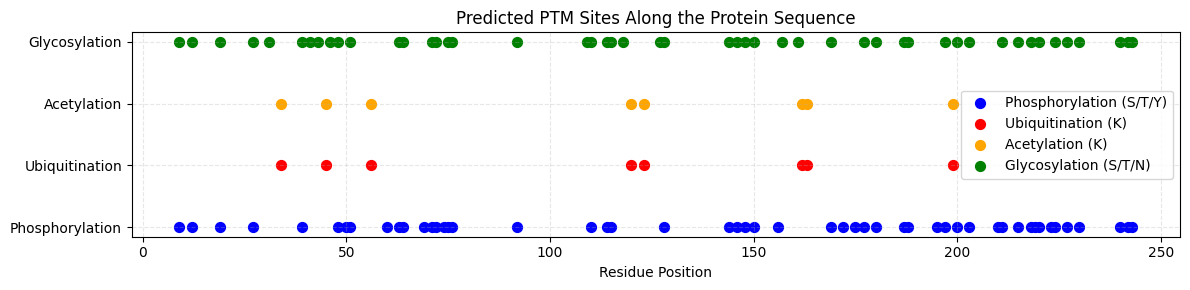

In [36]:
# ===== PLOT PTM SITES (EXTENSION TO EXISTING CODE) =====
import matplotlib.pyplot as plt

colors = {
    'Phosphorylation': 'blue',
    'Ubiquitination': 'red',
    'Acetylation': 'orange',
    'Glycosylation': 'green'
}

# Cria listas com posições dos resíduos por tipo
phospho = [i for i, aa in enumerate(seq) if aa in 'STY']
ubiquitin = [i for i, aa in enumerate(seq) if aa == 'K']
acetyl = [i for i, aa in enumerate(seq) if aa == 'K']
glyco = [i for i, aa in enumerate(seq) if aa in 'STN']

plt.figure(figsize=(12, 3))

plt.scatter(phospho, ['Phosphorylation']*len(phospho), color=colors['Phosphorylation'], label='Phosphorylation (S/T/Y)', s=50)
plt.scatter(ubiquitin, ['Ubiquitination']*len(ubiquitin), color=colors['Ubiquitination'], label='Ubiquitination (K)', s=50)
plt.scatter(acetyl, ['Acetylation']*len(acetyl), color=colors['Acetylation'], label='Acetylation (K)', s=50)
plt.scatter(glyco, ['Glycosylation']*len(glyco), color=colors['Glycosylation'], label='Glycosylation (S/T/N)', s=50)

plt.title("Predicted PTM Sites Along the Protein Sequence")
plt.xlabel("Residue Position")
plt.yticks(['Phosphorylation', 'Ubiquitination', 'Acetylation', 'Glycosylation'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
